In [7]:
   pip install squarify 

In [8]:
pip install circlify

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
#import missingno as msno

In [10]:
df = pd.read_csv('https://raw.githubusercontent.com/aashgohil/HR_Data_Science/main/aug_train.csv')

In [11]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [13]:
df["gender"].isnull().sum()

4508

In [14]:
df = df[df['gender'].notna()]

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14650 entries, 0 to 19156
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             14650 non-null  int64  
 1   city                    14650 non-null  object 
 2   city_development_index  14650 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     14650 non-null  object 
 5   enrolled_university     14437 non-null  object 
 6   education_level         14391 non-null  object 
 7   major_discipline        12672 non-null  object 
 8   experience              14634 non-null  object 
 9   company_size            10337 non-null  object 
 10  company_type            10217 non-null  object 
 11  last_new_job            14576 non-null  object 
 12  training_hours          14650 non-null  int64  
 13  target                  14650 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [17]:
# Visualize missingness
msno.matrix(df)
plt.show()

NameError: ignored

In [18]:
df_cl = df[["target","enrolled_university", "education_level", "major_discipline"]]

In [19]:
df_cl

,target,enrolled_university,education_level,major_discipline
0,1.0,no_enrollment,Graduate,STEM
1,0.0,no_enrollment,Graduate,STEM
4,0.0,no_enrollment,Masters,STEM
6,0.0,no_enrollment,High School,NaN
7,1.0,no_enrollment,Graduate,STEM
...,...,...,...,...
19152,0.0,no_enrollment,Graduate,Humanities
19153,1.0,no_enrollment,Graduate,Humanities
19154,1.0,no_enrollment,Graduate,STEM
19155,0.0,no_enrollment,Graduate,STEM


In [20]:
df_cl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14650 entries, 0 to 19156
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   target               14650 non-null  float64
 1   enrolled_university  14437 non-null  object 
 2   education_level      14391 non-null  object 
 3   major_discipline     12672 non-null  object 
dtypes: float64(1), object(3)
memory usage: 572.3+ KB


In [21]:
df_cl.describe()

,target
count,14650.000000
mean,0.231263
std,0.421654
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [22]:
for i in df_cl:
  df_cl[i].fillna("Unknown", inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [23]:
df_cl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14650 entries, 0 to 19156
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   target               14650 non-null  float64
 1   enrolled_university  14650 non-null  object 
 2   education_level      14650 non-null  object 
 3   major_discipline     14650 non-null  object 
dtypes: float64(1), object(3)
memory usage: 572.3+ KB


In [24]:

df_cl.head()

,target,enrolled_university,education_level,major_discipline
0,1.0,no_enrollment,Graduate,STEM
1,0.0,no_enrollment,Graduate,STEM
4,0.0,no_enrollment,Masters,STEM
6,0.0,no_enrollment,High School,Unknown
7,1.0,no_enrollment,Graduate,STEM


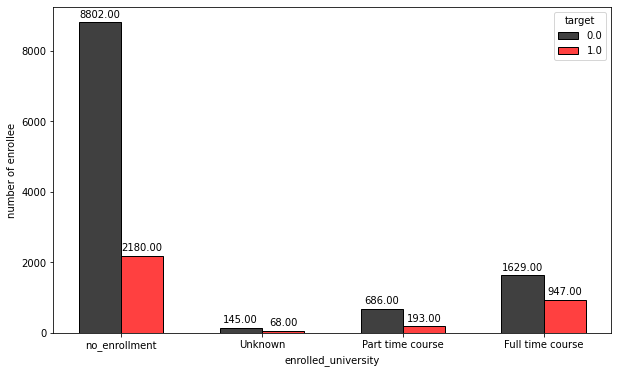

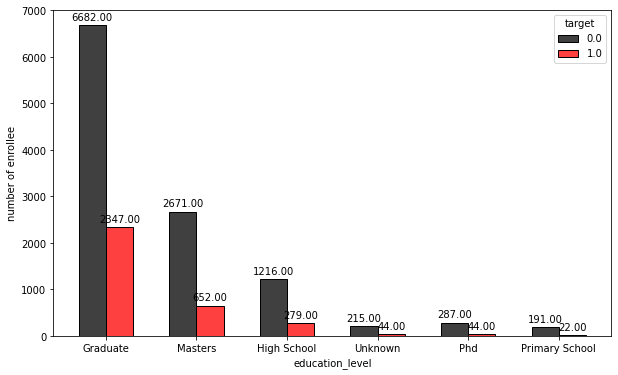

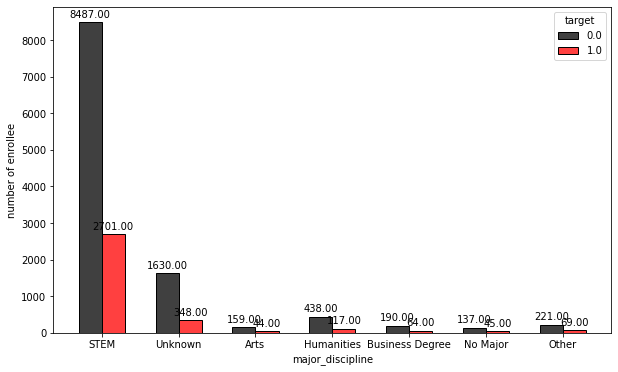

In [25]:
for i in df_cl.drop("target",axis=1):
  plt.figure(figsize=[10,6])
  hue_colors = {0:"black",1:"red"}   
  plots = sns.histplot(data = df_cl,x=i,hue="target",palette=hue_colors, multiple="dodge", shrink = 0.6)
  # Iterrating over the bars one-by-one
  for bar in plots.patches: 
    # Using Matplotlib's annotate function and
    # passing the coordinates where the annotation shall be done
    # x-coordinate: bar.get_x() + bar.get_width() / 2
    # y-coordinate: bar.get_height()
    # free space to be left to make graph pleasing: (0, 8)
    # ha and va stand for the horizontal and vertical alignment
      plots.annotate(format(bar.get_height(), '.2f'),
                    (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                    size=10, xytext=(0, 8),
                    textcoords='offset points')

  plt.xlabel(i)
  plt.ylabel("number of enrollee")
  plt.show()


In [26]:
for i in df_cl:
  print(df_cl[i].groupby(df_cl["target"]).value_counts())
  

target  target
0.0     0.0       11262
1.0     1.0        3388
Name: target, dtype: int64
target  enrolled_university
0.0     no_enrollment          8802
        Full time course       1629
        Part time course        686
        Unknown                 145
1.0     no_enrollment          2180
        Full time course        947
        Part time course        193
        Unknown                  68
Name: enrolled_university, dtype: int64
target  education_level
0.0     Graduate           6682
        Masters            2671
        High School        1216
        Phd                 287
        Unknown             215
        Primary School      191
1.0     Graduate           2347
        Masters             652
        High School         279
        Phd                  44
        Unknown              44
        Primary School       22
Name: education_level, dtype: int64
target  major_discipline
0.0     STEM                8487
        Unknown             1630
        Humanities 

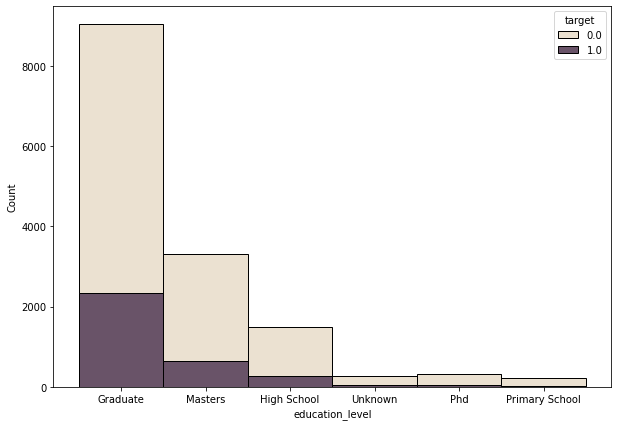

In [27]:
%matplotlib inline
plt.figure(figsize=[10,7])
sns.histplot(binwidth=1, x="education_level", hue="target", data=df_cl, palette="ch:.25", stat="count", multiple="stack")

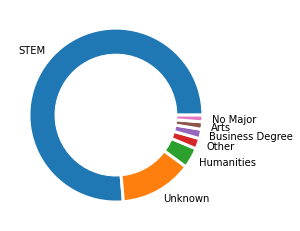

In [28]:
# donut chart 
# create data
values_m = df_cl["major_discipline"].value_counts()
labels_m = values_m.index
 
# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color='white')

# Custom wedges
plt.pie(values_m, labels=labels_m, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

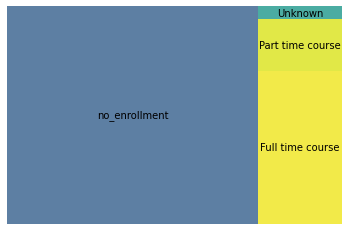

In [29]:

# Tree map 
values_u = df_cl["enrolled_university"].value_counts()
labels_u = values_u.index
squarify.plot(sizes=values_u, label=labels_u, alpha=0.8 )
plt.axis('off')
plt.show()

In [30]:

# import the circlify library
import circlify
values_e = df_cl["education_level"].value_counts().sort_values(ascending=False)
labels_e = df_cl["education_level"].value_counts().sort_values(ascending=True).index
# compute circle positions:
circles = circlify.circlify(
    values_e.tolist(), 
    show_enclosure=False, 
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)

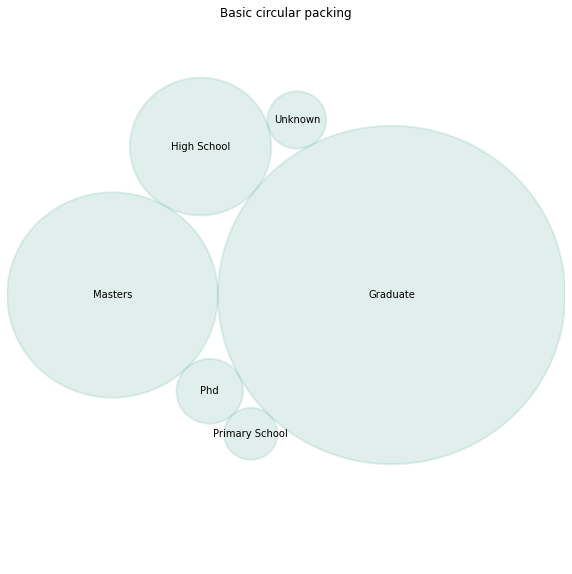

In [31]:
# circular packing
# Create just a figure and only one subplot
fig, ax = plt.subplots(figsize=(10,10))

# Title
ax.set_title('Basic circular packing')

# Remove axes
ax.axis('off')

# Find axis boundaries
lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# list of labels
labels = labels_e

# print circles
for circle, label in zip(circles, labels):
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r, alpha=0.2, color="#69b3a2",linewidth=2))
    plt.annotate(
          label, 
          (x,y ) ,
          va='center',
          ha='center'
     )
# https://www.python-graph-gallery.com/circular-packing-several-levels-of-hierarchy

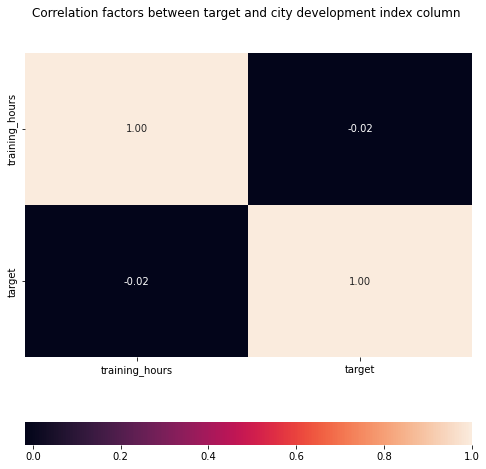

In [32]:



#heatmap
plt.figure(figsize=[8,8])
sns.heatmap(df[['training_hours','target']].corr(),annot=True,fmt='.2f',cbar_kws={"orientation": "horizontal"})
plt.title('Correlation factors between target and city development index column \n \n');